# 📊 Dataset Information

**Note:** The dataset for this project is **may not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Bi_Intro Dataset](https://www.kaggle.com/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


# Importing

## Import Libraray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('bi.csv', encoding='latin1')

# PreProcessing

## Details of Dataset

### Frist five row

In [3]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,24,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


### last Five row

In [4]:
df.tail()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74
76,Mohammed,Salim,31,Male,Somali,Sognsvann,35,Masters,144,72.0,90


### Shape of our dataset

In [5]:
df.shape

(77, 11)

### List out all columns

In [6]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

### Datatype of each columns

In [7]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Check Null Value

In [9]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Handle Null value, Replace with Mean

In [10]:
df['Python'] = df['Python'].fillna(df['Python'].mean())
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

### Check Duplicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

### summary of the dataset

In [12]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.233766,76.753247,149.714286,75.853333,69.467532
std,10.310822,16.475784,12.743272,15.206208,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


## Data Cleaning

### Clean Column Names

In [13]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [14]:
import re

def clean_column(name):
    words = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?![a-z])', name)
    return ''.join([w.capitalize() for w in words])

df.columns = [clean_column(col) for col in df.columns]

df.columns

Index(['FName', 'LName', 'Age', 'Gender', 'Country', 'Residence', 'EntryExam',
       'PrevEducation', 'StudyHours', 'Python', 'Db'],
      dtype='object')

### Standardize Country Names

In [15]:
df['Country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [16]:
country_mapping  = {
    'Rsa': 'Russia',
    'Norge': 'Norway',
    'norway': 'Norway',
    'UK': 'United Kingdom',
    'Somali': 'Somalia'
}

df["Country"] = df["Country"].replace(country_mapping)
df['Country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Russia', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'United Kingdom', 'Somalia',
       'Nigeria', 'Germany', 'France'], dtype=object)

### Standardize Education Leavl

In [17]:
df['PrevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [18]:
education_mapping = {
    'HighSchool': 'High School',
    'High School': 'High School',
    'Bachelors': 'Bachelors',
    'Barrrchelors': 'Bachelors',
    'Masters': 'Masters',
    'Diploma': 'Diploma',
    'diploma': 'Diploma',
    'DIPLOMA': 'Diploma',
    'Diplomaaa': 'Diploma',
    'Doctorate': 'Doctorate'
}
df['PrevEducation'] = df['PrevEducation'].replace(education_mapping)
print(df['PrevEducation'].unique())

['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']


### Standardize Gender Values

In [19]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [20]:
gender_mapping = {
    'F': 'Female',
    'Female': 'Female',
    'female': 'Female',
    'M': 'Male',
    'Male': 'Male',
    'male': 'Male'
}

df['Gender'] = df['Gender'].replace(gender_mapping)

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Standardize Residence Values

In [21]:
df['Residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [22]:
residence_mapping = {
    'Private': 'Private',
    'Sognsvann': 'Sognsvann',
    'BI Residence': 'BI Residence',
    'BI-Residence': 'BI Residence',
    'BIResidence': 'BI Residence',
    'BI_Residence': 'BI Residence'
}
df['Residence'] = df['Residence'].replace(residence_mapping)
print(df['Residence'].unique())

['Private' 'Sognsvann' 'BI Residence']


### Full Name Column

In [23]:
df.insert(0, 'Name', df['FName'] + ' ' + df['LName'])

df = df.drop(columns=['FName', 'LName'])

df['Name']

0     Christina Binger
1        Alex Walekhwa
2           Philip Leo
3      Shoni Hlongwane
4       Maria Kedibone
            ...       
72       Clara Bernard
73      Julian Nielsen
74        Sophie Brown
75          Leon Bauer
76      Mohammed Salim
Name: Name, Length: 77, dtype: object

### Needed Columns formatted to two decimal places

In [24]:
df['EntryExam'] = df['EntryExam'].map('{:.2f}'.format)
df['StudyHours'] = df['StudyHours'].map('{:.2f}'.format)
df['Python'] = df['Python'].map('{:.2f}'.format)
df['Db'] = df['Db'].map('{:.2f}'.format)

# Final Dataset

## First 5 row

In [25]:
df.head()

,Name,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,Db
0,Christina Binger,44,Female,Norway,Private,72.00,Masters,158.00,59.00,55.00
1,Alex Walekhwa,60,Male,Kenya,Private,79.00,Diploma,150.00,60.00,75.00
2,Philip Leo,25,Male,Uganda,Sognsvann,55.00,High School,130.00,74.00,50.00
3,Shoni Hlongwane,24,Female,Russia,Sognsvann,40.00,High School,120.00,75.85,44.00
4,Maria Kedibone,23,Female,South Africa,Sognsvann,65.00,High School,122.00,91.00,80.00


## Last 5 row

In [26]:
df.tail()

,Name,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,Db
72,Clara Bernard,43,Female,France,Private,80.00,Bachelors,150.00,75.00,43.00
73,Julian Nielsen,31,Male,Denmark,Sognsvann,90.00,Masters,158.00,84.00,83.00
74,Sophie Brown,33,Female,United Kingdom,Sognsvann,96.00,Masters,158.00,85.00,90.00
75,Leon Bauer,35,Male,Germany,Sognsvann,90.00,Masters,160.00,87.00,74.00
76,Mohammed Salim,31,Male,Somalia,Sognsvann,35.00,Masters,144.00,72.00,90.00


# Outlier

## Find Outlier using Plot

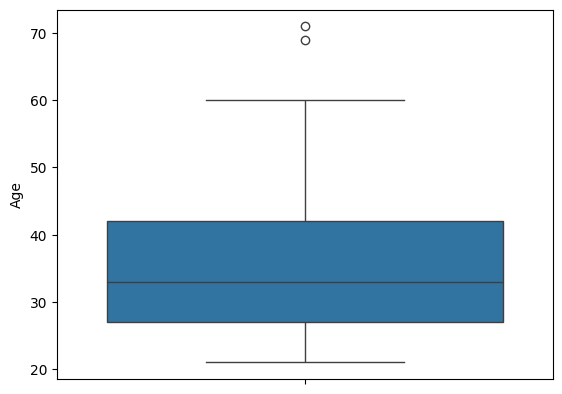

In [27]:
sns.boxplot(y = 'Age', data=df)
plt.show()

## Find Outlier using IQR

In [28]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(15.0)

In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 4.5, Upper Bound: 64.5


### Identify outliers

In [30]:
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

outliers['Age']

32    71
55    69
Name: Age, dtype: int64

### Replace Outlier with Mean

In [31]:
mean_age = df['Age'].mean()
for i in outliers.index:
    df.at[i, 'Age'] = mean_age

# EDA

In [32]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

## Univariate

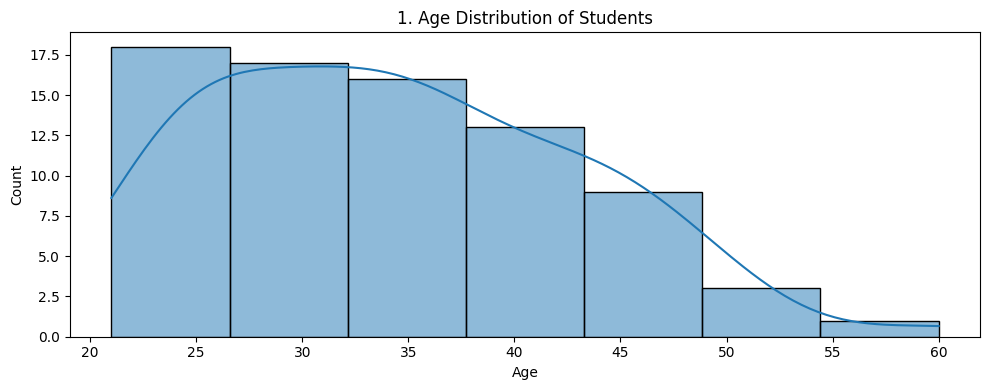

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'], bins=7, kde=True)
plt.title(f'{plot_no}. Age Distribution of Students')
show_fig()
plot_no += 1

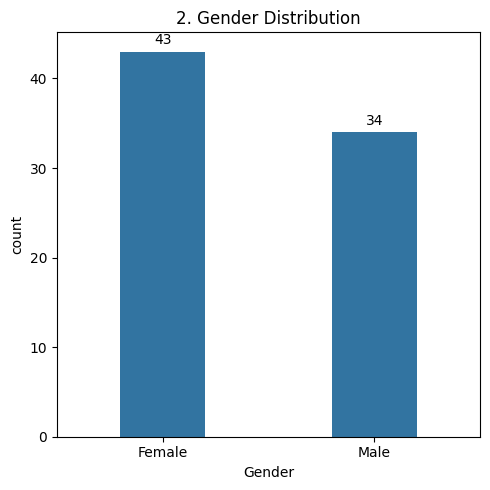

In [34]:
plt.figure(figsize=(5,5))
ax = sns.countplot(df,x='Gender',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title(f"{plot_no}. Gender Distribution")

show_fig()
plot_no += 1

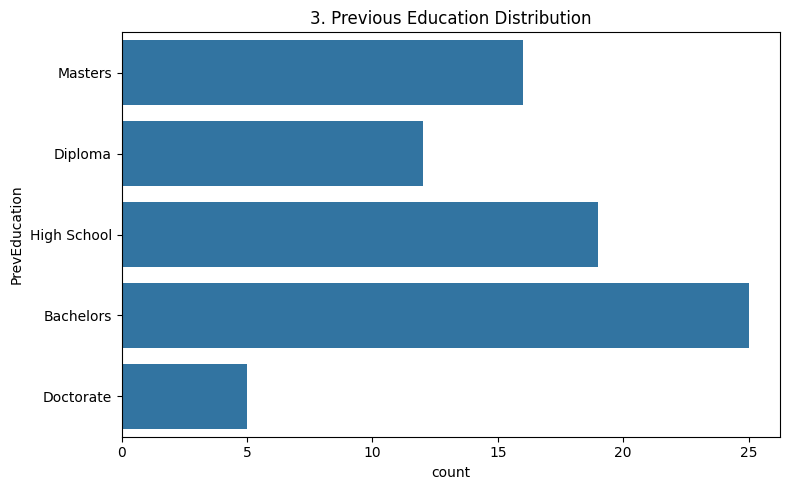

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(y="PrevEducation", data=df)
plt.title(f"{plot_no}. Previous Education Distribution")
show_fig()
plot_no += 1

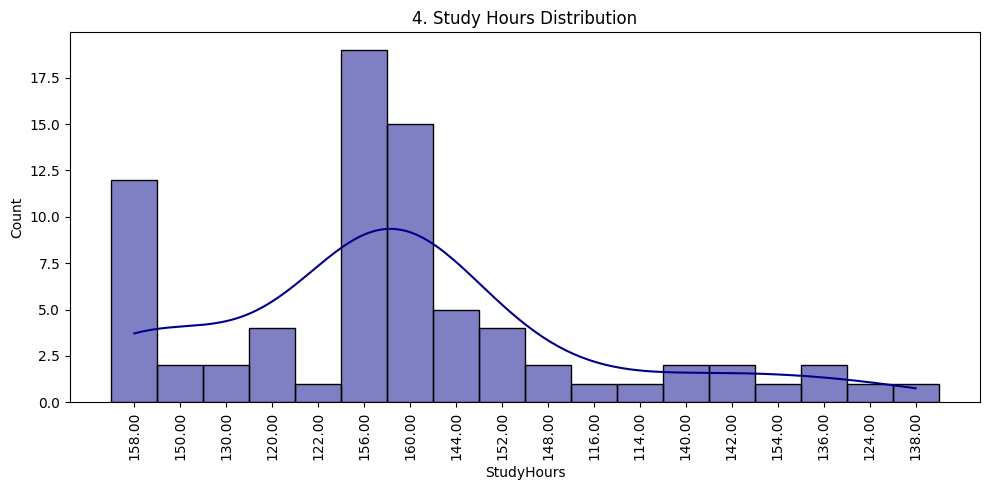

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['StudyHours'], bins=20, kde=True, color="darkblue")
plt.title(f"{plot_no}. Study Hours Distribution")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

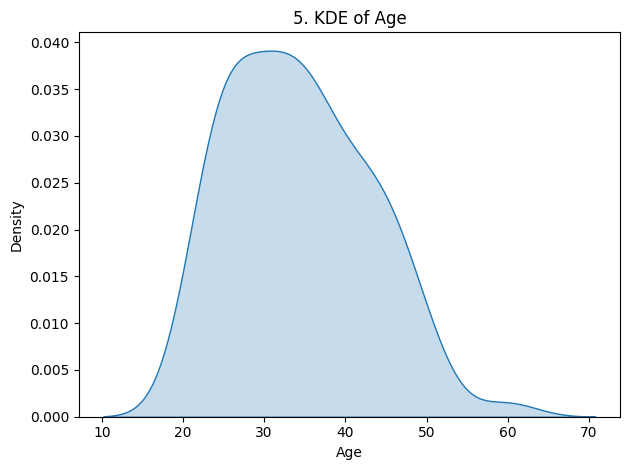

In [37]:
sns.kdeplot(df['Age'], shade=True)
plt.title(f"{plot_no}. KDE of Age")
show_fig()
plot_no += 1

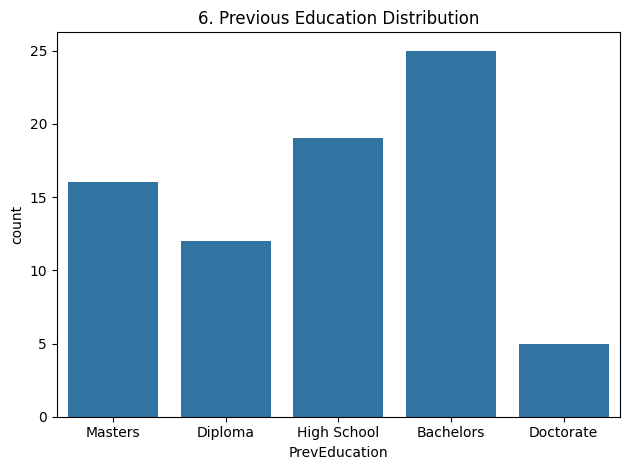

In [38]:
sns.countplot(x='PrevEducation', data=df)
plt.title(f"{plot_no}. Previous Education Distribution")
show_fig()
plot_no += 1

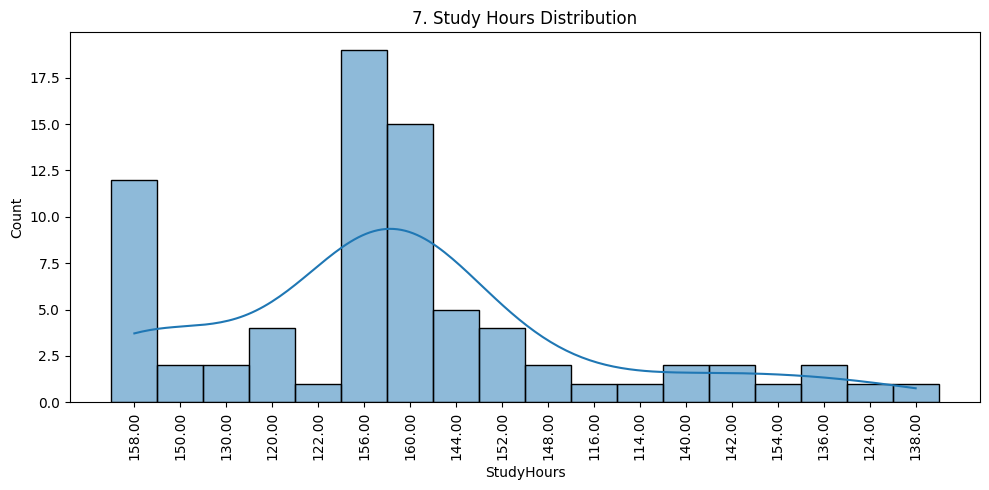

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['StudyHours'], bins=10, kde=True)
plt.title(f"{plot_no}. Study Hours Distribution")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

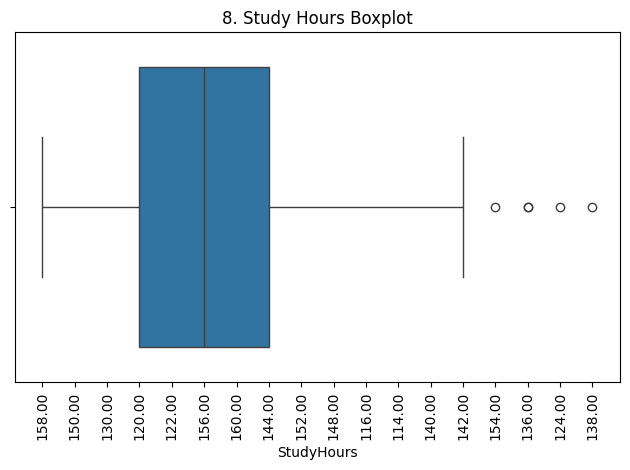

In [40]:
sns.boxplot(x=df['StudyHours'])
plt.title(f"{plot_no}. Study Hours Boxplot")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

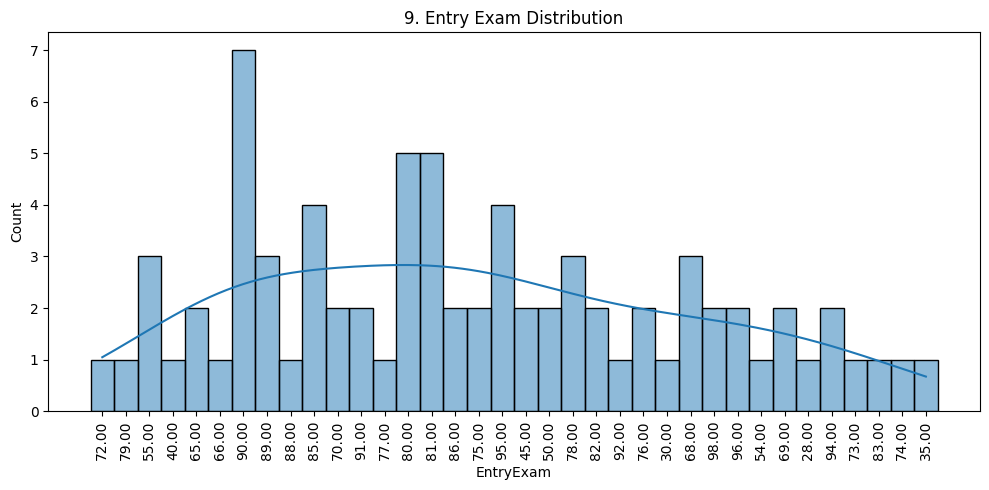

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df['EntryExam'], kde=True)
plt.title(f"{plot_no}. Entry Exam Distribution")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

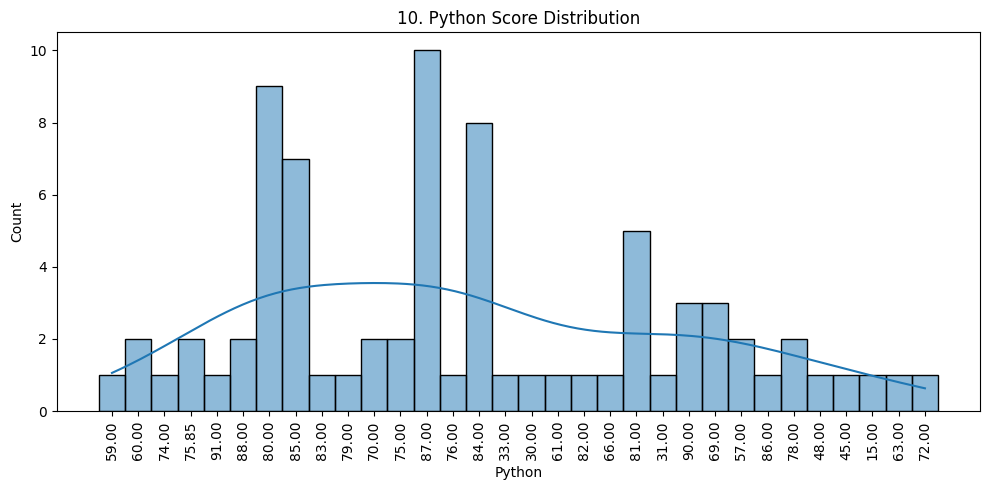

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['Python'], kde=True)
plt.title(f"{plot_no}. Python Score Distribution")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

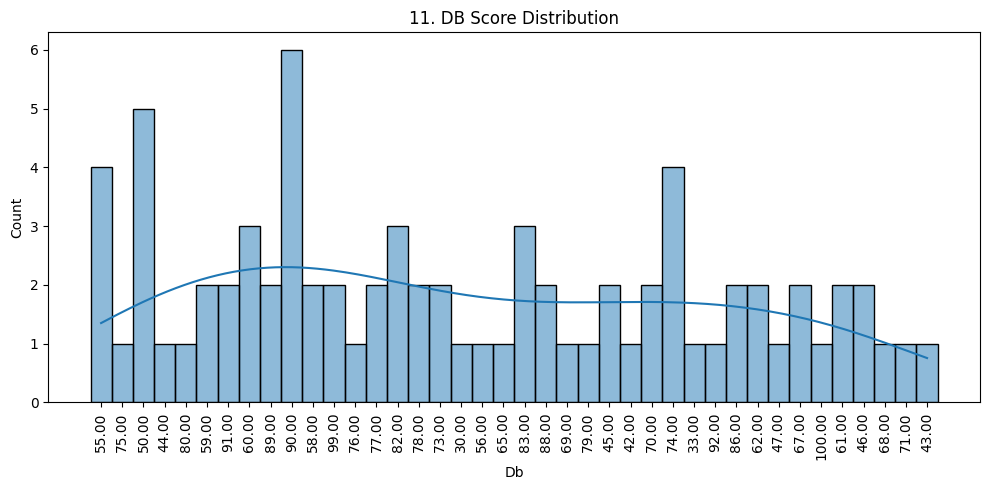

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['Db'], kde=True)
plt.title(f"{plot_no}. DB Score Distribution")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

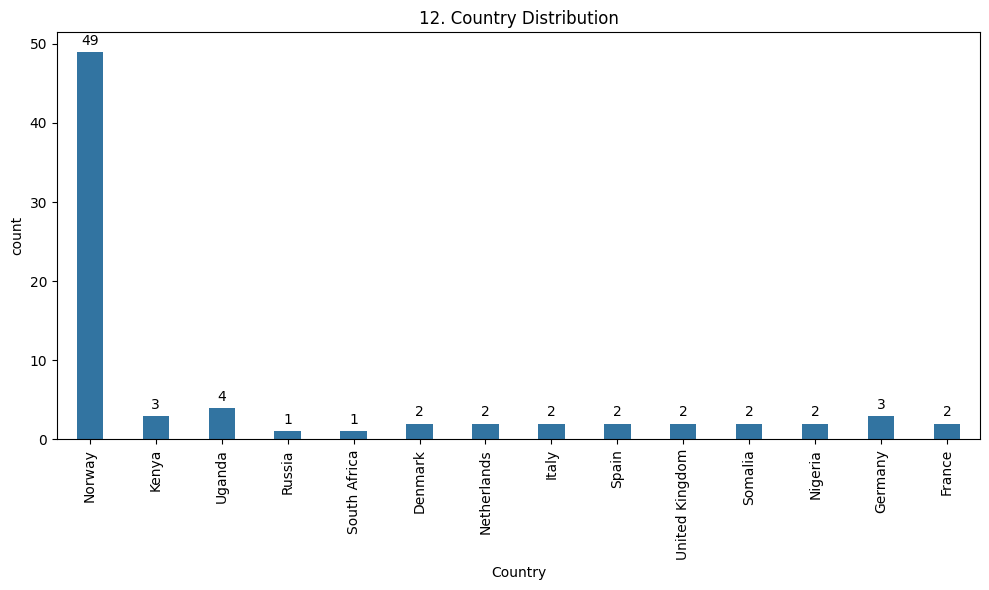

In [44]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='Country',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title(f"{plot_no}. Country Distribution")
plt.xticks(rotation=90)

show_fig()
plot_no += 1

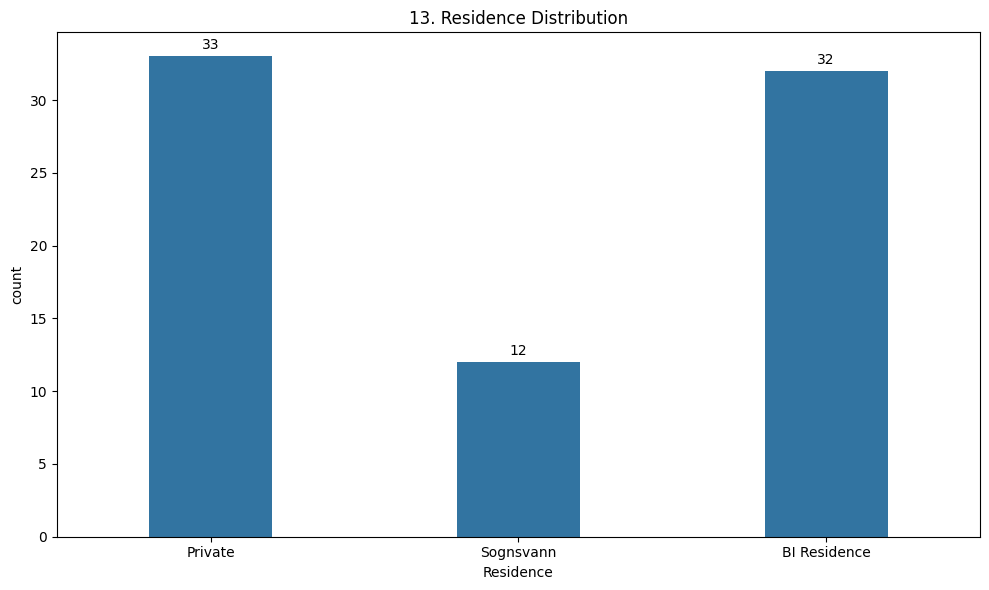

In [45]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='Residence',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title(f"{plot_no}. Residence Distribution")

show_fig()
plot_no += 1

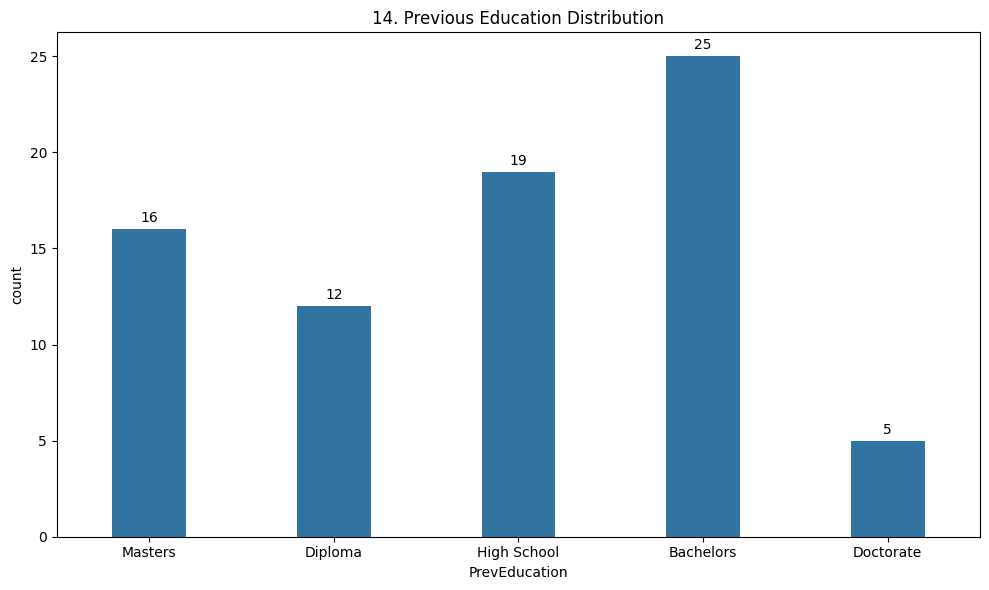

In [46]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='PrevEducation',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title(f"{plot_no}. Previous Education Distribution")
show_fig()
plot_no += 1

## Bivariate

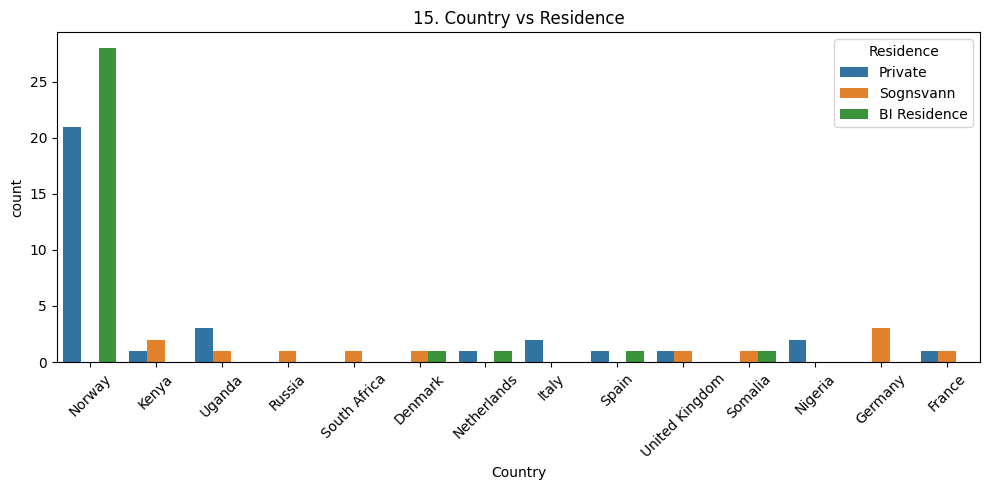

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x="Country", hue="Residence", data=df)
plt.title(f"{plot_no}. Country vs Residence")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

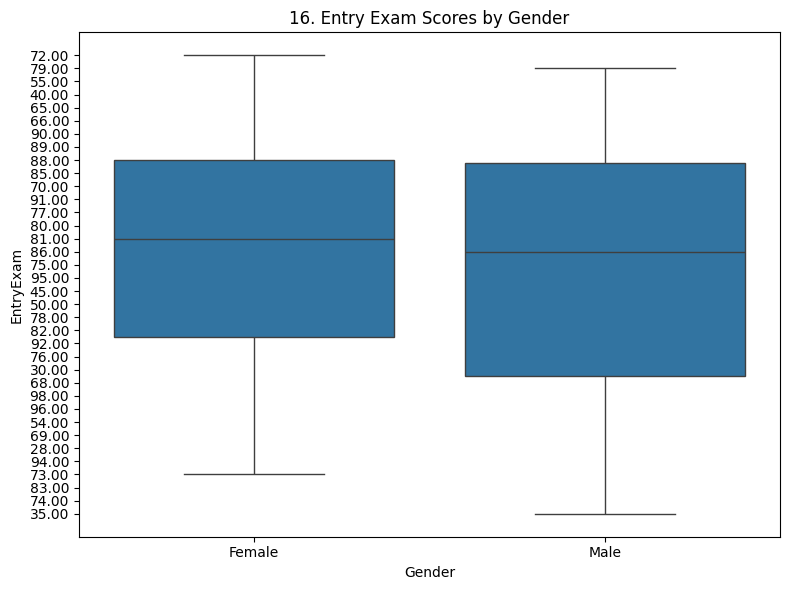

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="EntryExam", data=df)
plt.title(f"{plot_no}. Entry Exam Scores by Gender")
show_fig()
plot_no += 1

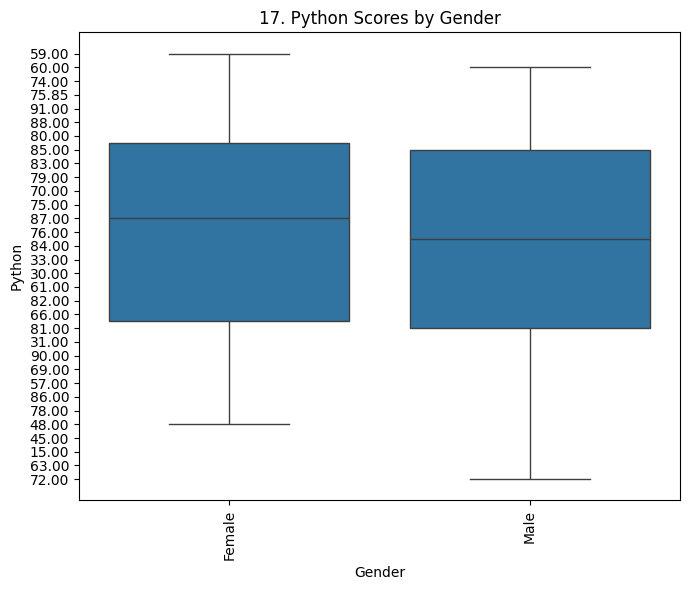

In [49]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Python', data=df)
plt.title(f"{plot_no}. Python Scores by Gender")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

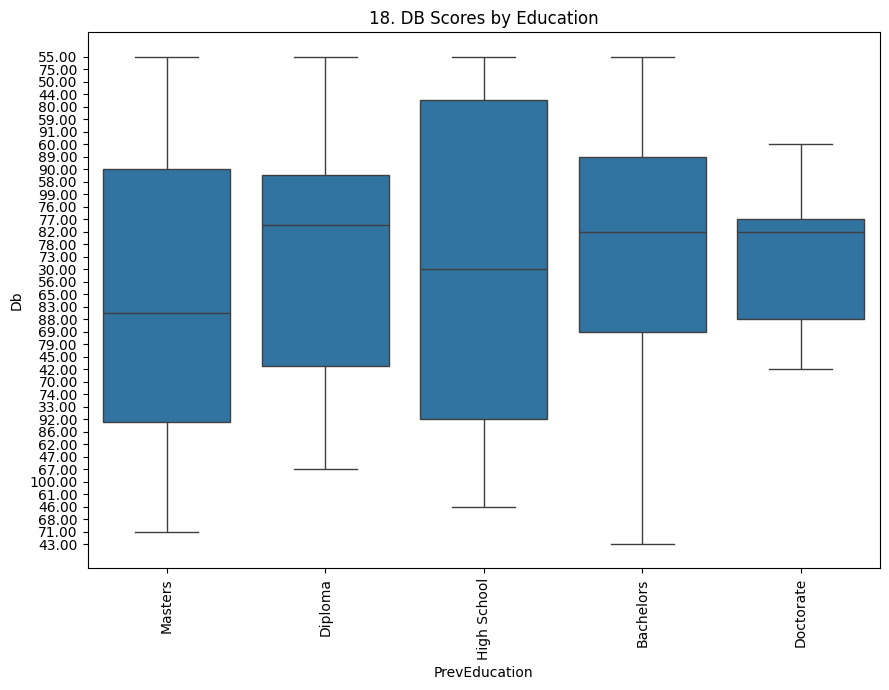

In [50]:
plt.figure(figsize=(9,7))
sns.boxplot(x='PrevEducation', y='Db', data=df)
plt.title(f"{plot_no}. DB Scores by Education")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

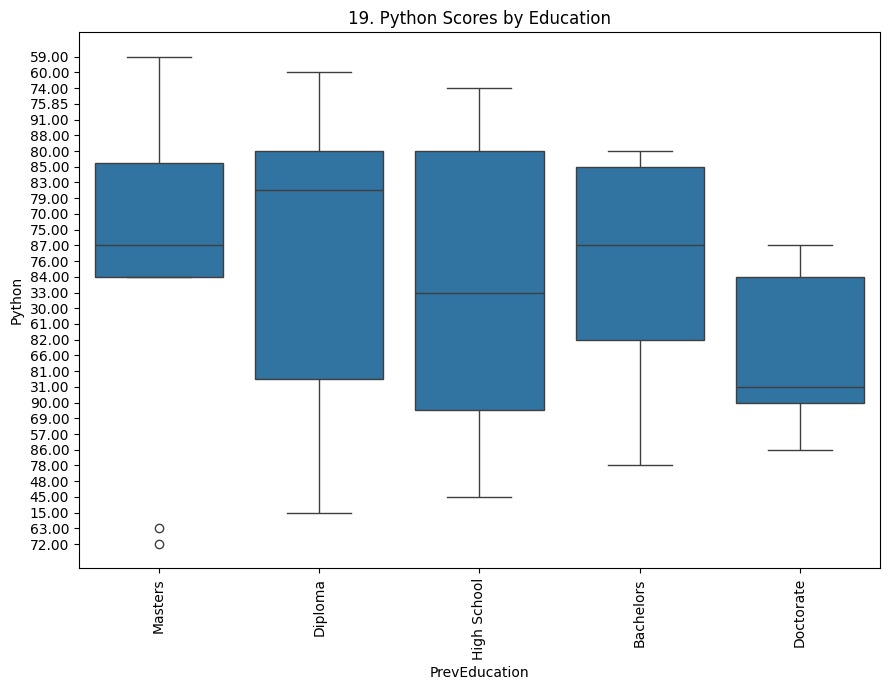

In [51]:
plt.figure(figsize=(9,7))
sns.boxplot(x='PrevEducation', y='Python', data=df)
plt.title(f"{plot_no}. Python Scores by Education")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

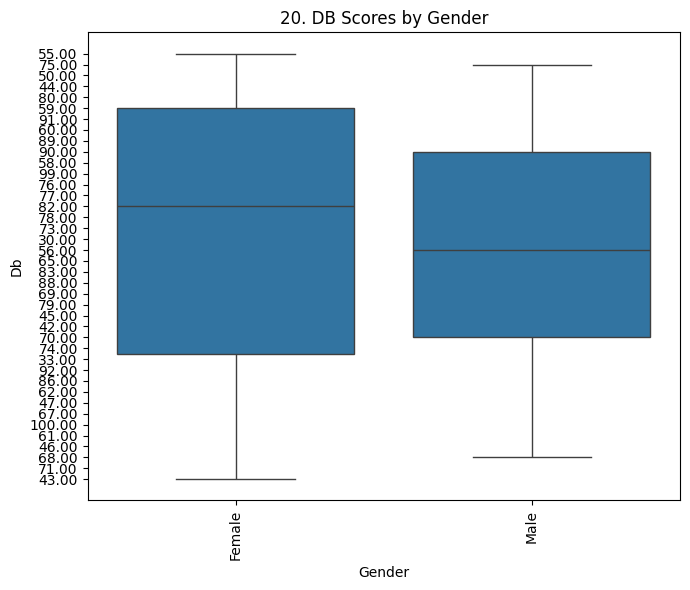

In [52]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Db', data=df)
plt.title(f"{plot_no}. DB Scores by Gender")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

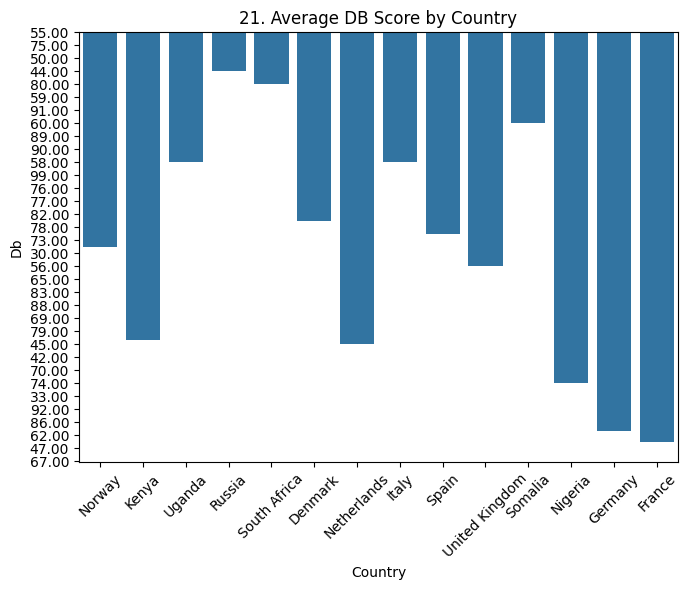

In [53]:
plt.figure(figsize=(7,6))
sns.barplot(x='Country', y='Db', data=df, estimator="mean", errorbar=None)
plt.title(f"{plot_no}. Average DB Score by Country")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

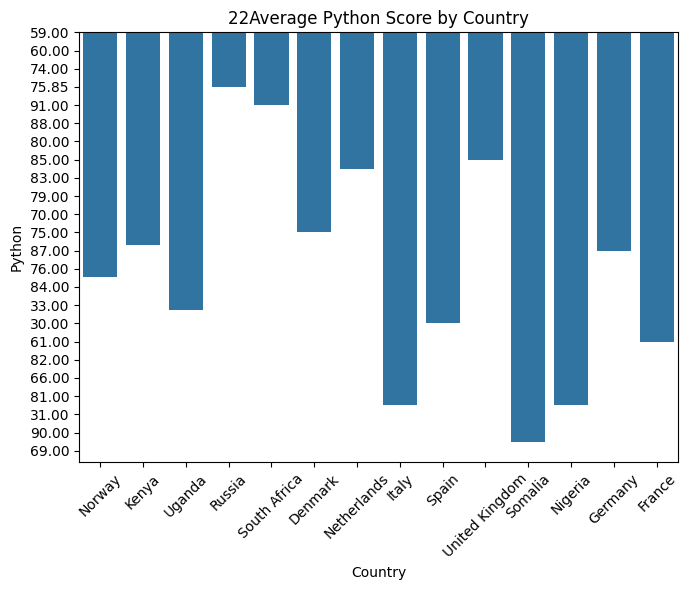

In [54]:
plt.figure(figsize=(7,6))
sns.barplot(x='Country', y='Python', data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title(f"{plot_no}Average Python Score by Country")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

<Figure size 700x600 with 0 Axes>

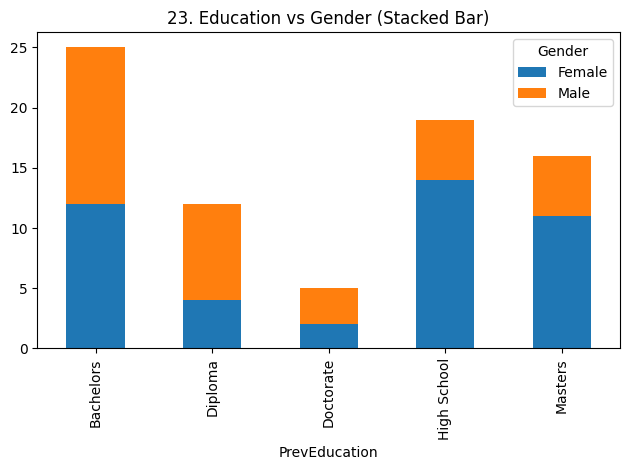

In [55]:
plt.figure(figsize=(7,6))
pd.crosstab(df['PrevEducation'], df['Gender']).plot(kind="bar", stacked=True)
plt.title(f"{plot_no}. Education vs Gender (Stacked Bar)")
show_fig()
plot_no += 1

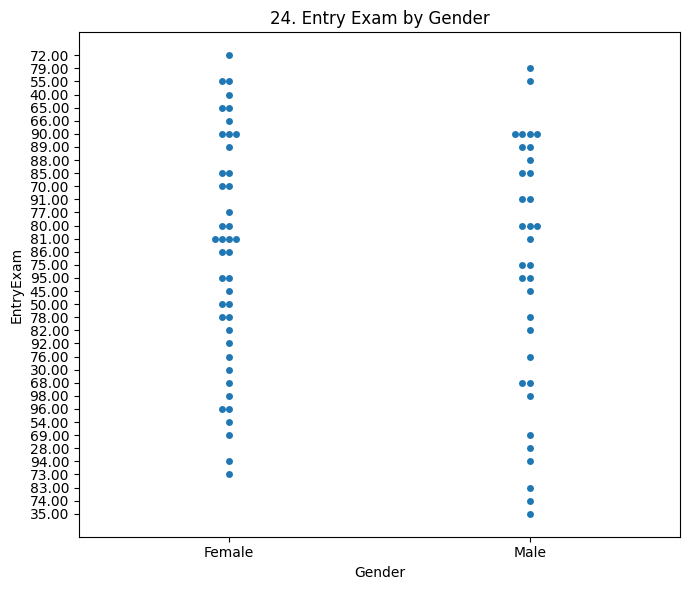

In [56]:
plt.figure(figsize=(7,6))
sns.swarmplot(x='Gender', y='EntryExam', data=df)
plt.title(f"{plot_no}. Entry Exam by Gender")
show_fig()
plot_no += 1

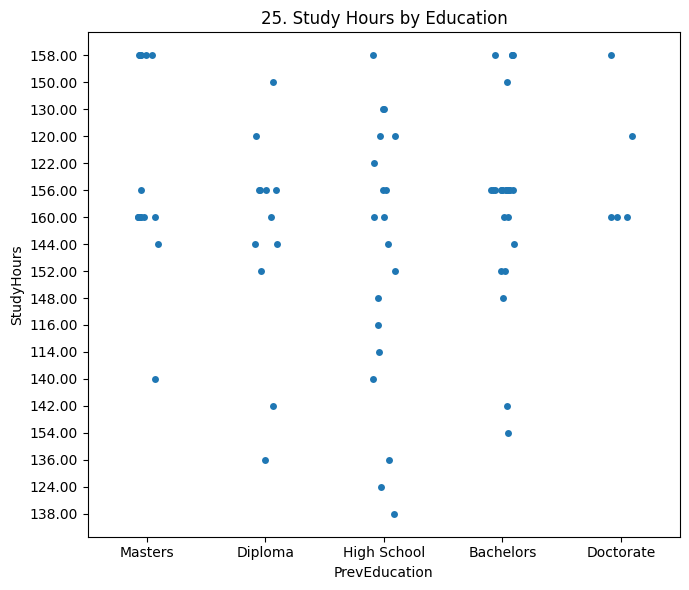

In [57]:
plt.figure(figsize=(7,6))
sns.stripplot(x='PrevEducation', y='StudyHours', data=df, jitter=True)
plt.title(f"{plot_no}. Study Hours by Education")
show_fig()
plot_no += 1

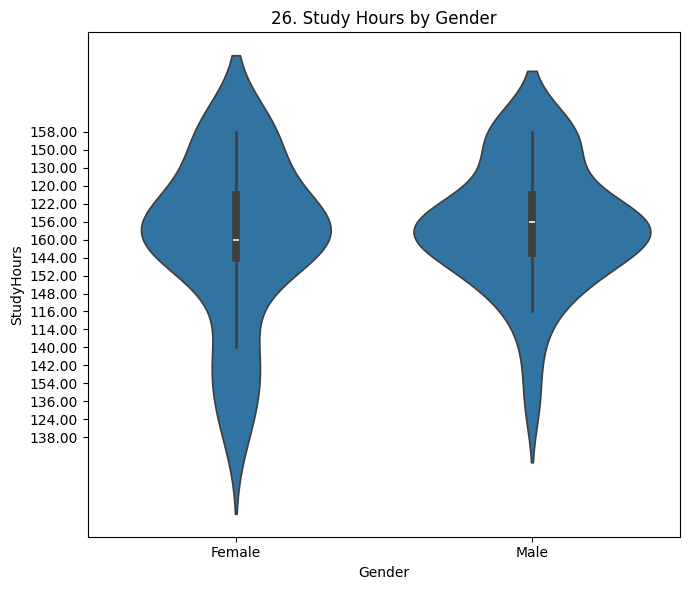

In [58]:
plt.figure(figsize=(7,6))
sns.violinplot(x='Gender', y='StudyHours', data=df)
plt.title(f"{plot_no}. Study Hours by Gender")
show_fig()
plot_no += 1

## Multivariate

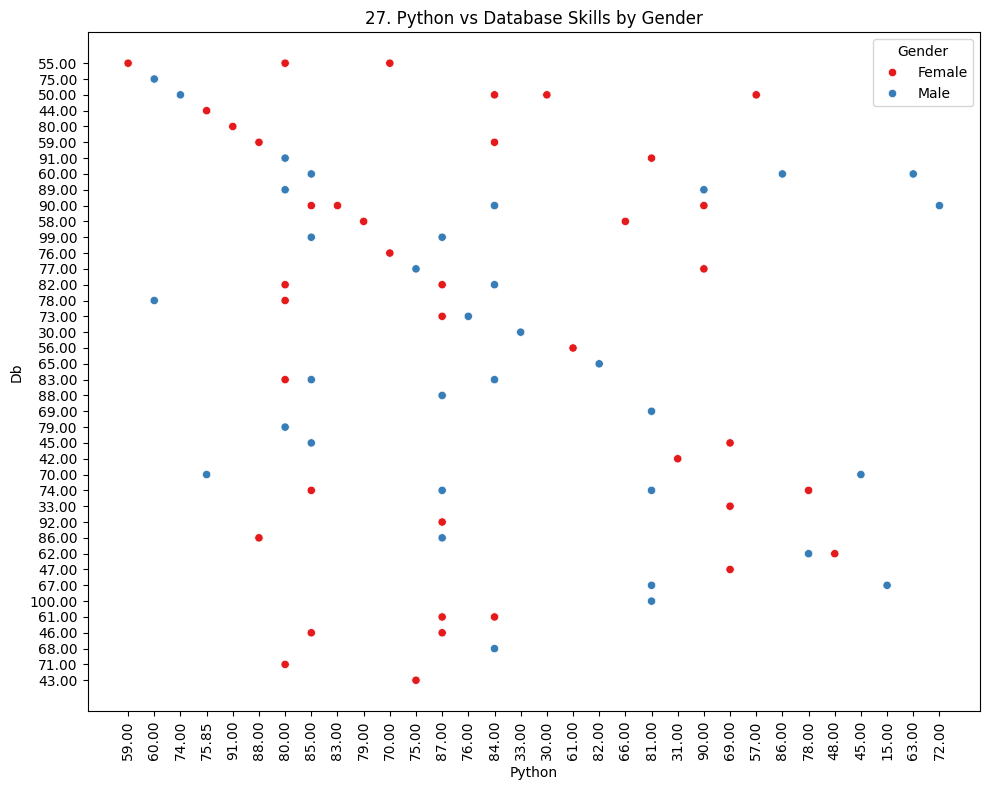

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Python", y="Db", hue="Gender", data=df, palette="Set1")
plt.title(f"{plot_no}. Python vs Database Skills by Gender")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

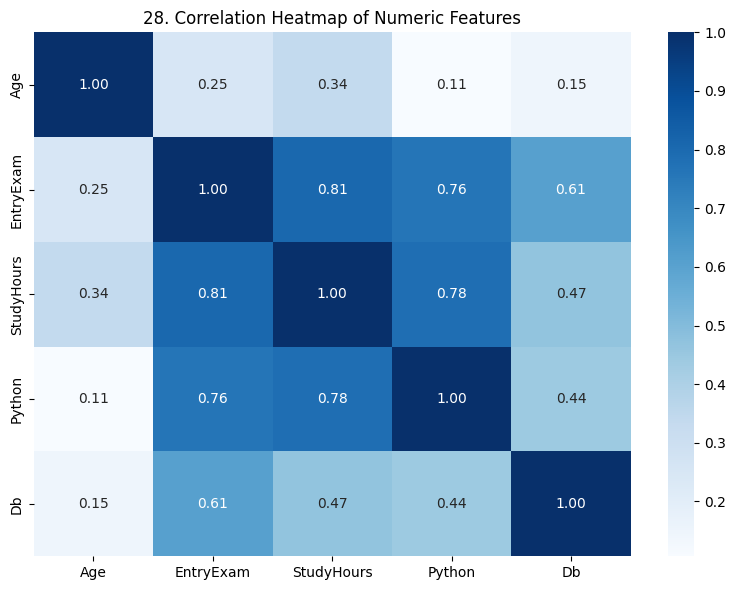

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','EntryExam','StudyHours','Python','Db']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title(f"{plot_no}. Correlation Heatmap of Numeric Features")
show_fig()
plot_no += 1

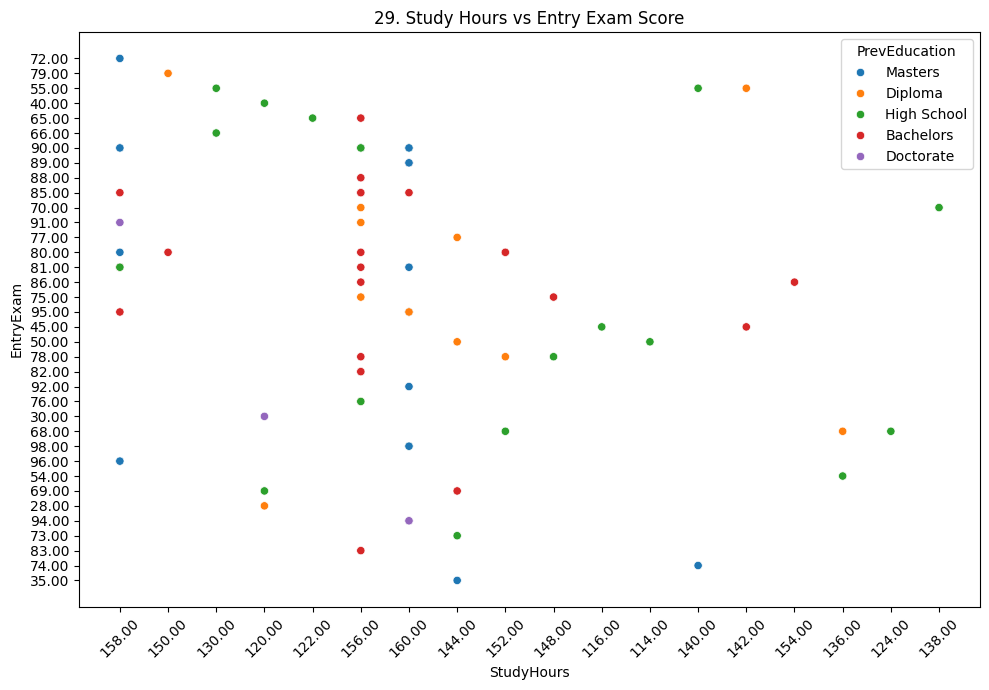

In [61]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="StudyHours", y="EntryExam", hue="PrevEducation", data=df)
plt.title(f"{plot_no}. Study Hours vs Entry Exam Score")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

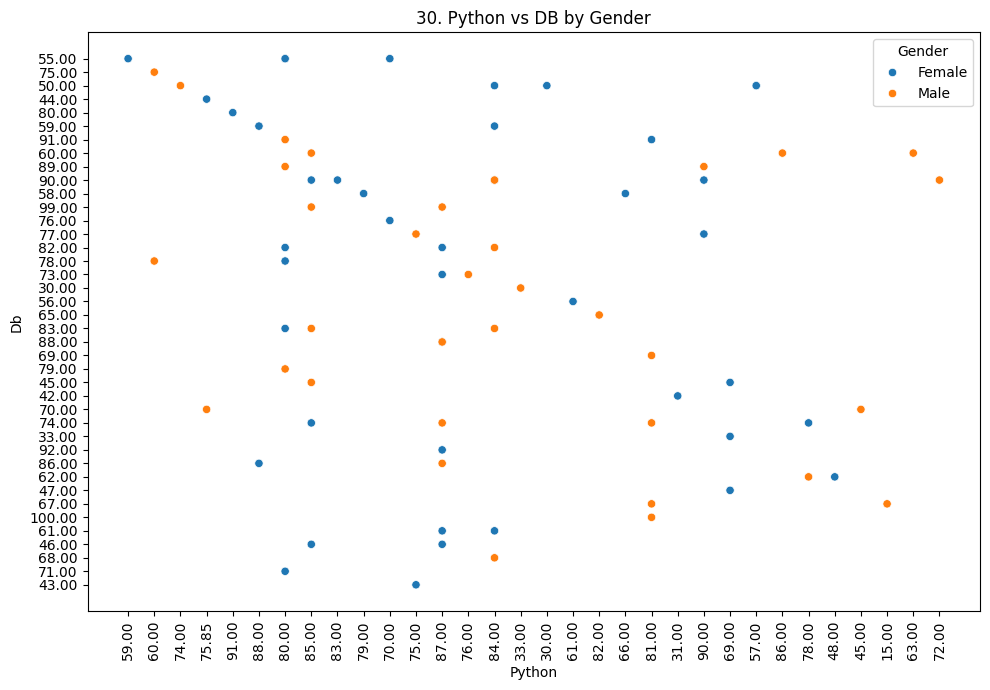

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Python', y='Db', hue='Gender', data=df)
plt.title(f"{plot_no}. Python vs DB by Gender")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

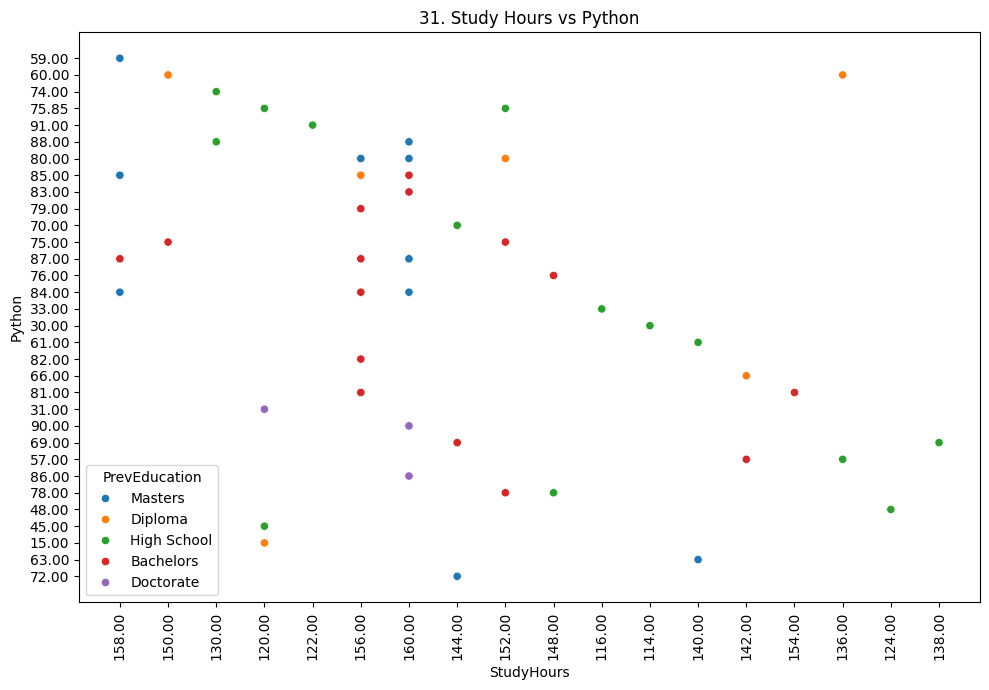

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='StudyHours', y='Python', hue='PrevEducation', data=df)
plt.title(f"{plot_no}. Study Hours vs Python")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

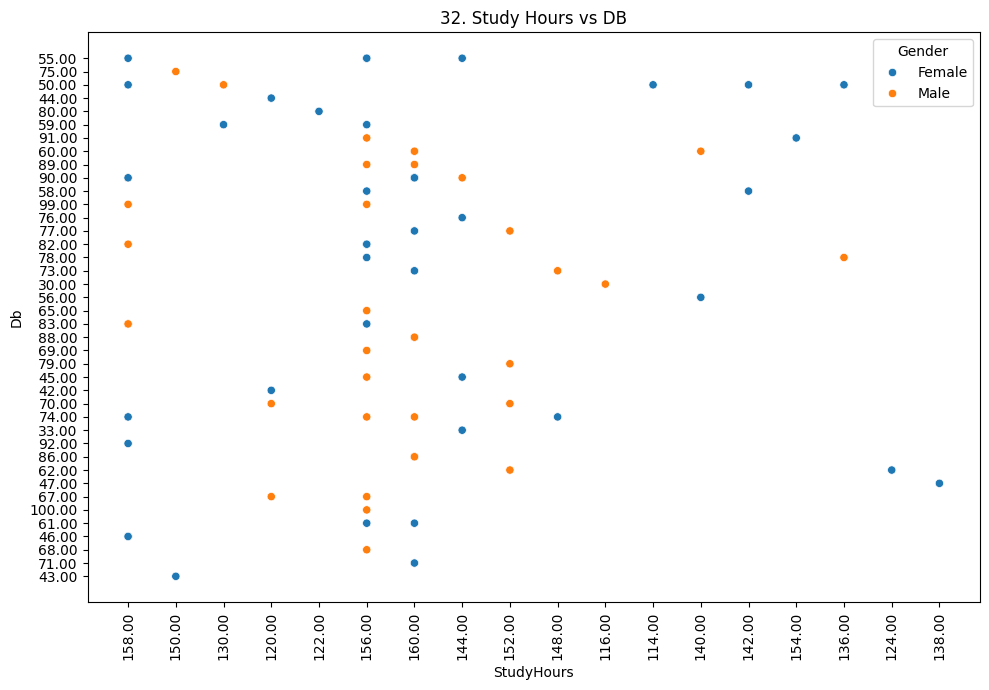

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='StudyHours', y='Db', hue='Gender', data=df)
plt.title(f"{plot_no}. Study Hours vs DB")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

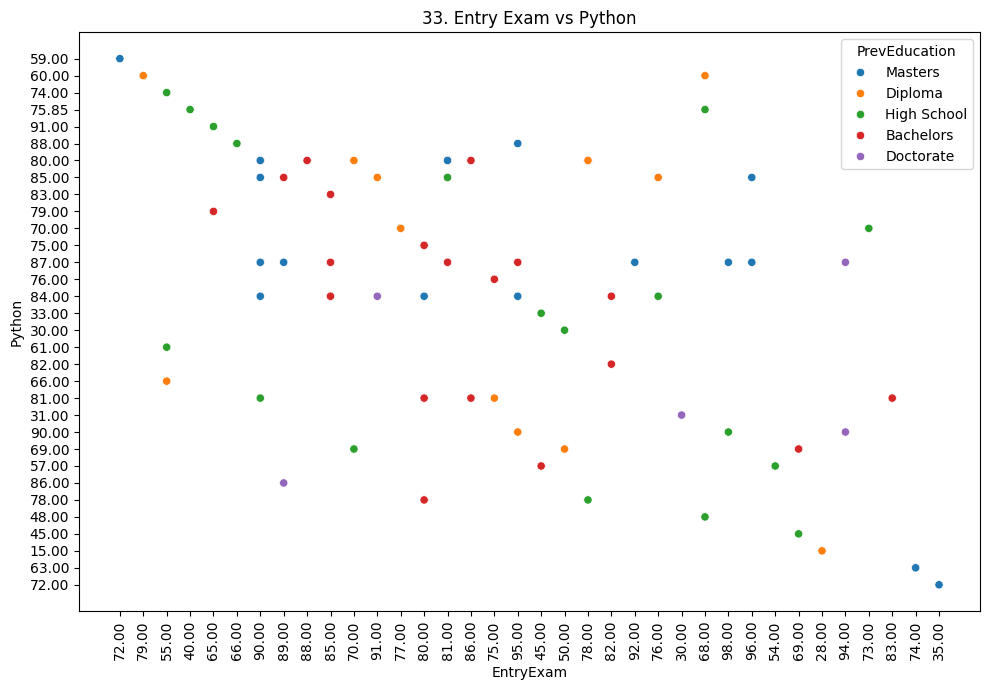

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='EntryExam', y='Python', hue='PrevEducation', data=df)
plt.title(f"{plot_no}. Entry Exam vs Python")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

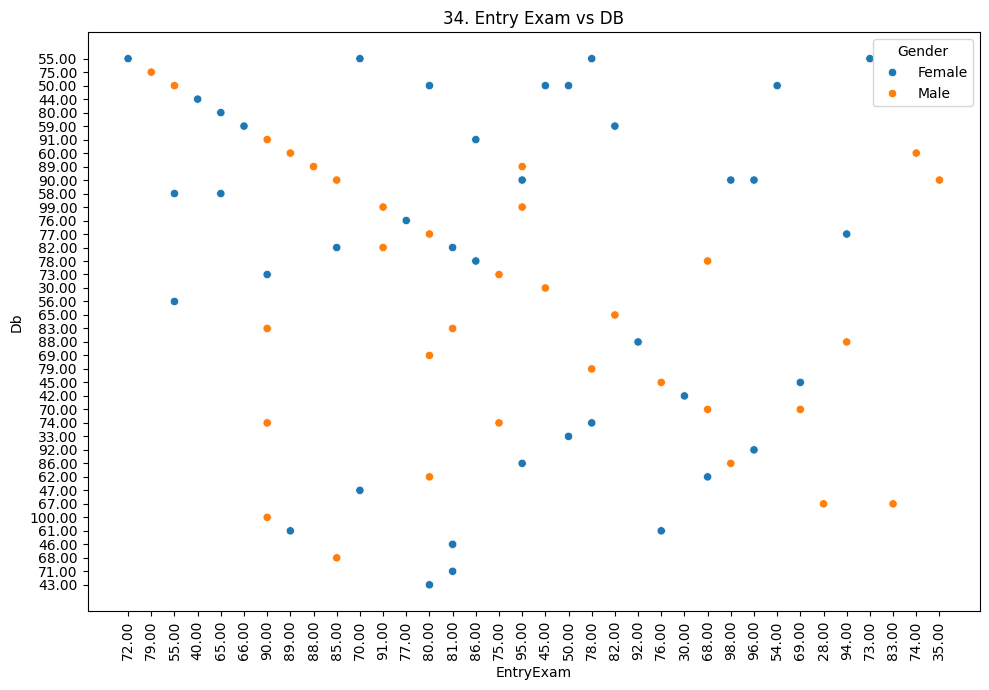

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='EntryExam', y='Db', hue='Gender', data=df)
plt.title(f"{plot_no}. Entry Exam vs DB")
plt.xticks(rotation=90)
show_fig()
plot_no += 1

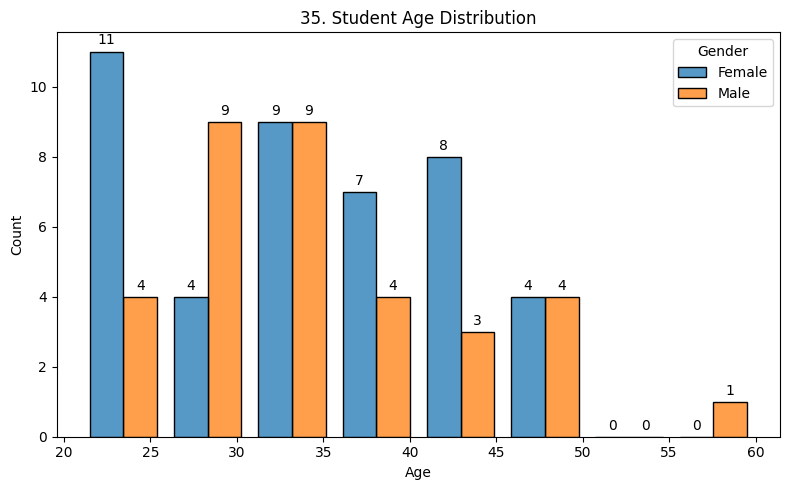

In [67]:
plt.figure(figsize=(8,5))
ax =sns.histplot(data=df, x="Age", hue="Gender", multiple="dodge", shrink=.8)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title(f"{plot_no}. Student Age Distribution")

show_fig()
plot_no += 1

# Predictive modeling¶

In [68]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [69]:
# Feature engineering
num_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()

df[num_cols] = df[num_cols].fillna(df[num_cols].median())


for cols in cat_cols:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

encoder = LabelEncoder()

for cols in cat_cols:
    df[cols]= encoder.fit_transform(df[cols].astype(str))

X = df.drop(columns = ['Name','EntryExam'])

y = df['EntryExam']

In [70]:
X.shape,y.shape

((77, 8), (77,))

In [71]:
## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

In [72]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    results[name] = r2
    print(f"{name:20} : {r2:.2f} %")

Linear Regression    : 75.05 %
Random Forest        : 71.46 %
Gradient Boosting    : 74.27 %
SVM                  : 48.22 %
XGBoost              : 58.19 %


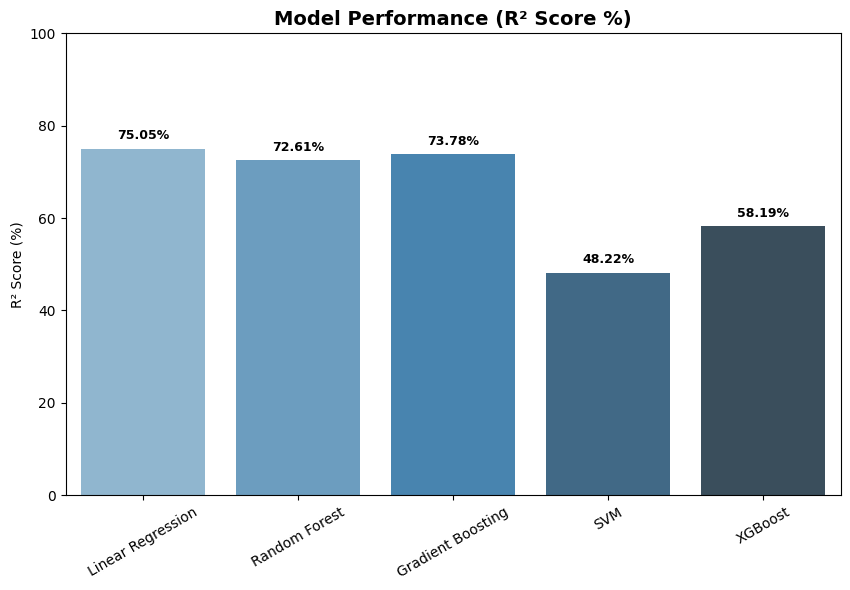

In [73]:
results = {
    "Linear Regression": 75.05,
    "Random Forest": 72.61,
    "Gradient Boosting": 73.78,
    "SVM": 48.22,
    "XGBoost": 58.19
}

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")
plt.title("Model Performance (R² Score %)", fontsize=14, fontweight="bold")
plt.ylabel("R² Score (%)")
plt.ylim(0,100)
plt.xticks(rotation=30)

# Annotate values on top
for i, v in enumerate(results.values()):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=9, fontweight="bold")

plt.show()